In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/uber-data-analysis/UberDataset.csv


In [2]:
data = pd.read_csv("/kaggle/input/uber-data-analysis/UberDataset.csv")

In [3]:
data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [4]:
data = data.dropna()

**Questions** :
1. What is the distribution of trip purposes? - Analyze the frequency of different trip purposes (e.g., work, personal, business) to understand the primary reasons for Uber rides.
2. What are the most common start and end destinations? - Identify the most frequently visited locations to determine popular pickup and drop-off points.
3.What is the most common purpose for Uber trips?
4.Can we identify any patterns or trends in the data based on the start dates of the trips? For example, are there specific days or times when Uber drives are more frequent?
5.Is there any relationship between trip duration and the purpose of the drive? Do certain purposes tend to result in longer or shorter trips?


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 653 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  653 non-null    object 
 1   END_DATE    653 non-null    object 
 2   CATEGORY    653 non-null    object 
 3   START       653 non-null    object 
 4   STOP        653 non-null    object 
 5   MILES       653 non-null    float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 40.8+ KB


In [6]:
data.describe()

,MILES
count,653.000000
mean,11.196325
std,22.986429
min,0.500000
25%,3.200000
50%,6.400000
75%,10.400000
max,310.300000


In [7]:
data['CATEGORY'].value_counts()

Business    647
Personal      6
Name: CATEGORY, dtype: int64

Text(0.5, 1.0, 'Uber Trip Category Counts')

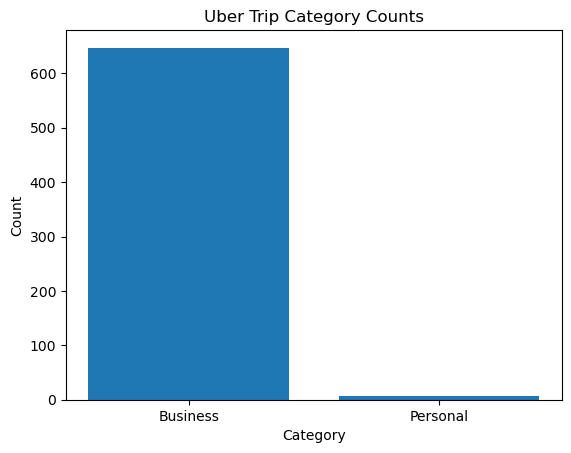

In [8]:
counts_category = data['CATEGORY'].value_counts()
plt.bar(counts_category.index,counts_category.values)

plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Uber Trip Category Counts')


**Ans 1:** Most of uber rides are used for business trips 

In [9]:
data.drop(data[data['START'] == 'Unknown Location'].index, inplace=True)
data.drop(data[data['STOP'] == 'Unknown Location'].index, inplace=True)

In [10]:
start_counts =data['START'].value_counts()
stop_counts =data['STOP'].value_counts()

In [11]:
# Combine the counts for start and end destinations
combined_counts = pd.concat([start_counts, stop_counts], axis=1)
combined_counts.columns = ['Start', 'Stop']

In [12]:

# Sort the destinations based on their total count
sorted_counts = combined_counts.sum(axis=1).sort_values(ascending=False)

In [13]:
# Subset the top N destinations for the heatmap
top_n = 10  # Choose the number of top destinations to include
subset_counts = sorted_counts.head(top_n)
subset_data = combined_counts.loc[subset_counts.index]

Text(95.72222222222221, 0.5, 'Top Destinations')

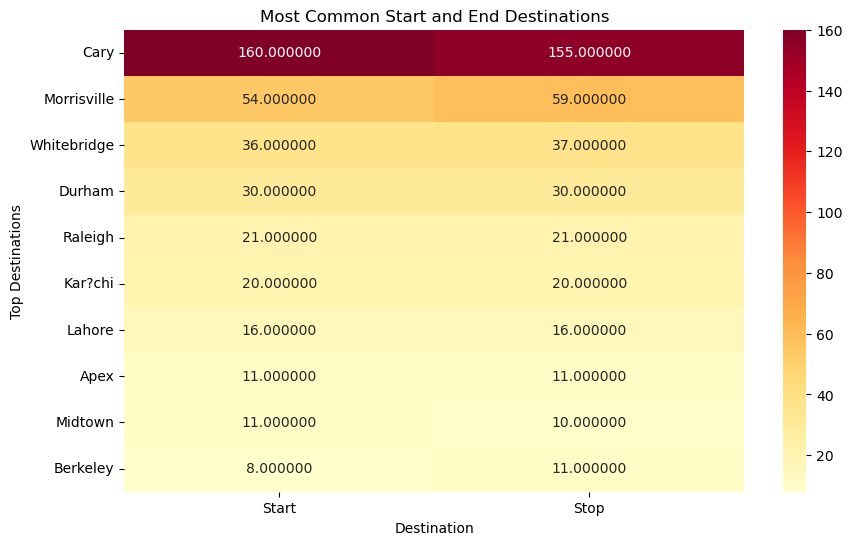

In [14]:

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(subset_data, cmap='YlOrRd', annot=True, fmt='f')

plt.title('Most Common Start and End Destinations')
plt.xlabel('Destination')
plt.ylabel('Top Destinations')

**ANS 2:**  The most common start and stop destination is Cary

In [15]:
pie=data['PURPOSE'].value_counts()

Text(0.5, 1.0, 'Purpose of Trips')

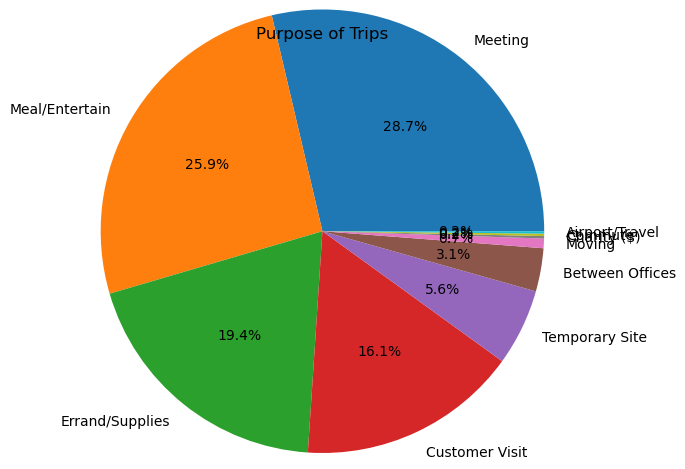

In [16]:
plt.pie(pie, labels=pie.index,radius=1.5, colors=None, autopct='%1.1f%%')
plt.title('Purpose of Trips')

**ANS 3:**Uber is most used for meal/enterntainment 

In [17]:
# Convert the 'start_date' column to datetime format
data['START_DATE'] = pd.to_datetime(data['START_DATE'],  format='%m/%d/%Y %H:%M', errors='coerce')
data['START_DATE'] = pd.to_datetime(data['START_DATE'],  format='%m-%d-%Y %H:%M', errors='coerce')

In [18]:
# Extract day of the week from start dates
data['day_of_week'] = data['START_DATE'].dt.day_name()

In [19]:
# Group by day of the week and calculate the count of Uber drives
drive_counts_by_day = data['day_of_week'].value_counts()

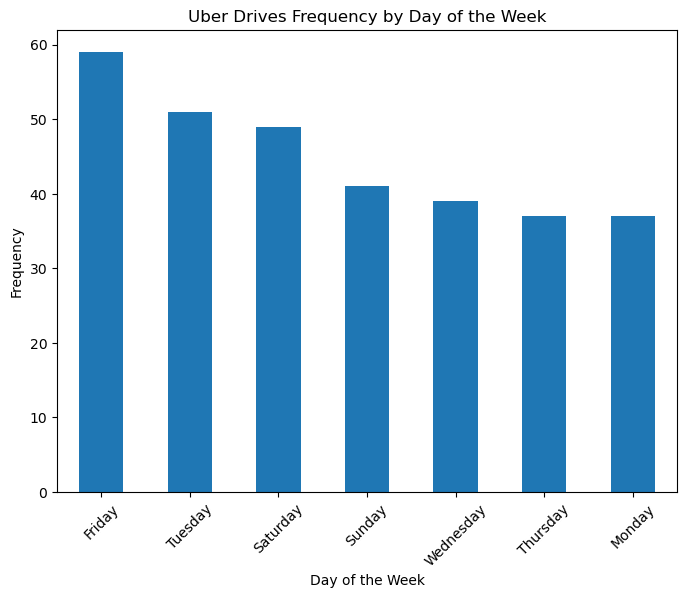

In [20]:
# Plot the frequency of Uber drives by day of the week
plt.figure(figsize=(8, 6))
drive_counts_by_day.plot(kind='bar')
plt.xlabel('Day of the Week')
plt.ylabel('Frequency')
plt.title('Uber Drives Frequency by Day of the Week')
plt.xticks(rotation=45)
plt.show()

**ANS 4:** Fridays are most busy days for uber drivers!!

In [21]:
# Convert the 'start_date' column to datetime format
data['END_DATE'] = pd.to_datetime(data['END_DATE'],  format='%m/%d/%Y %H:%M', errors='coerce')
data['END_DATE'] = pd.to_datetime(data['END_DATE'],  format='%m-%d-%Y %H:%M', errors='coerce')

In [22]:
# Calculate the trip duration in minutes
data['trip_duration'] = (data['END_DATE'] - data['START_DATE']).dt.total_seconds() / 60

In [23]:
# Group the data by purpose and calculate the average trip duration
avg_duration_by_purpose = data.groupby('PURPOSE')['trip_duration'].mean()

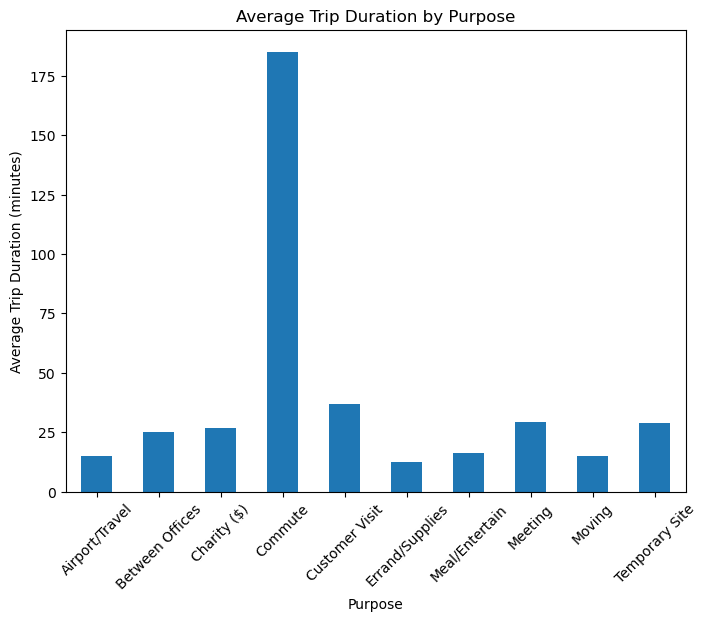

In [24]:
# Plot the average trip duration by purpose
plt.figure(figsize=(8, 6))
avg_duration_by_purpose.plot(kind='bar')
plt.xlabel('Purpose')
plt.ylabel('Average Trip Duration (minutes)')
plt.title('Average Trip Duration by Purpose')
plt.xticks(rotation=45)
plt.show()

ANS 5: Commute in general takes longer duration

**Lets build a ML model using Linear Regression to predict trip duration based on the purpose of the drive and other relevant features**

In [25]:
# Check for null values in the target variable 'y'
null_values = data['trip_duration'].isnull().sum()

print(f"Number of null values in the target variable 'y': {null_values}")

Number of null values in the target variable 'y': 259


In [26]:
data.dropna(subset=['trip_duration'], inplace=True)


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [28]:
features = ['MILES', 'PURPOSE']
target = 'trip_duration'

In [29]:
# Preprocess the data
X = data[features]
y = data[target]

In [30]:
# Convert categorical feature to numerical using one-hot encoding
X = pd.get_dummies(X, columns=['PURPOSE'])

In [31]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [33]:

y_pred = model.predict(X_test)

In [34]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 125.63866385777179
